In [ ]:
import sklearn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [9]:
!ls

drive  sample_data


In [ ]:
!cd /content/drive/MyDrive/DT

In [11]:
%cd '/gdrive/MyDrive/DT'

/gdrive/MyDrive/DT


In [12]:
!ls

'Copy of pima-indians-diabetes.csv'   pima-indians-diabetes.csv   test.csv   train.csv


In [13]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(r"pima-indians-diabetes.csv", header=None, names=col_names)
pima.head()

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[114  32]
 [ 42  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       146
           1       0.57      0.51      0.54        85

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.65       231
weighted avg       0.67      0.68      0.67       231

Accuracy: 0.6796536796536796


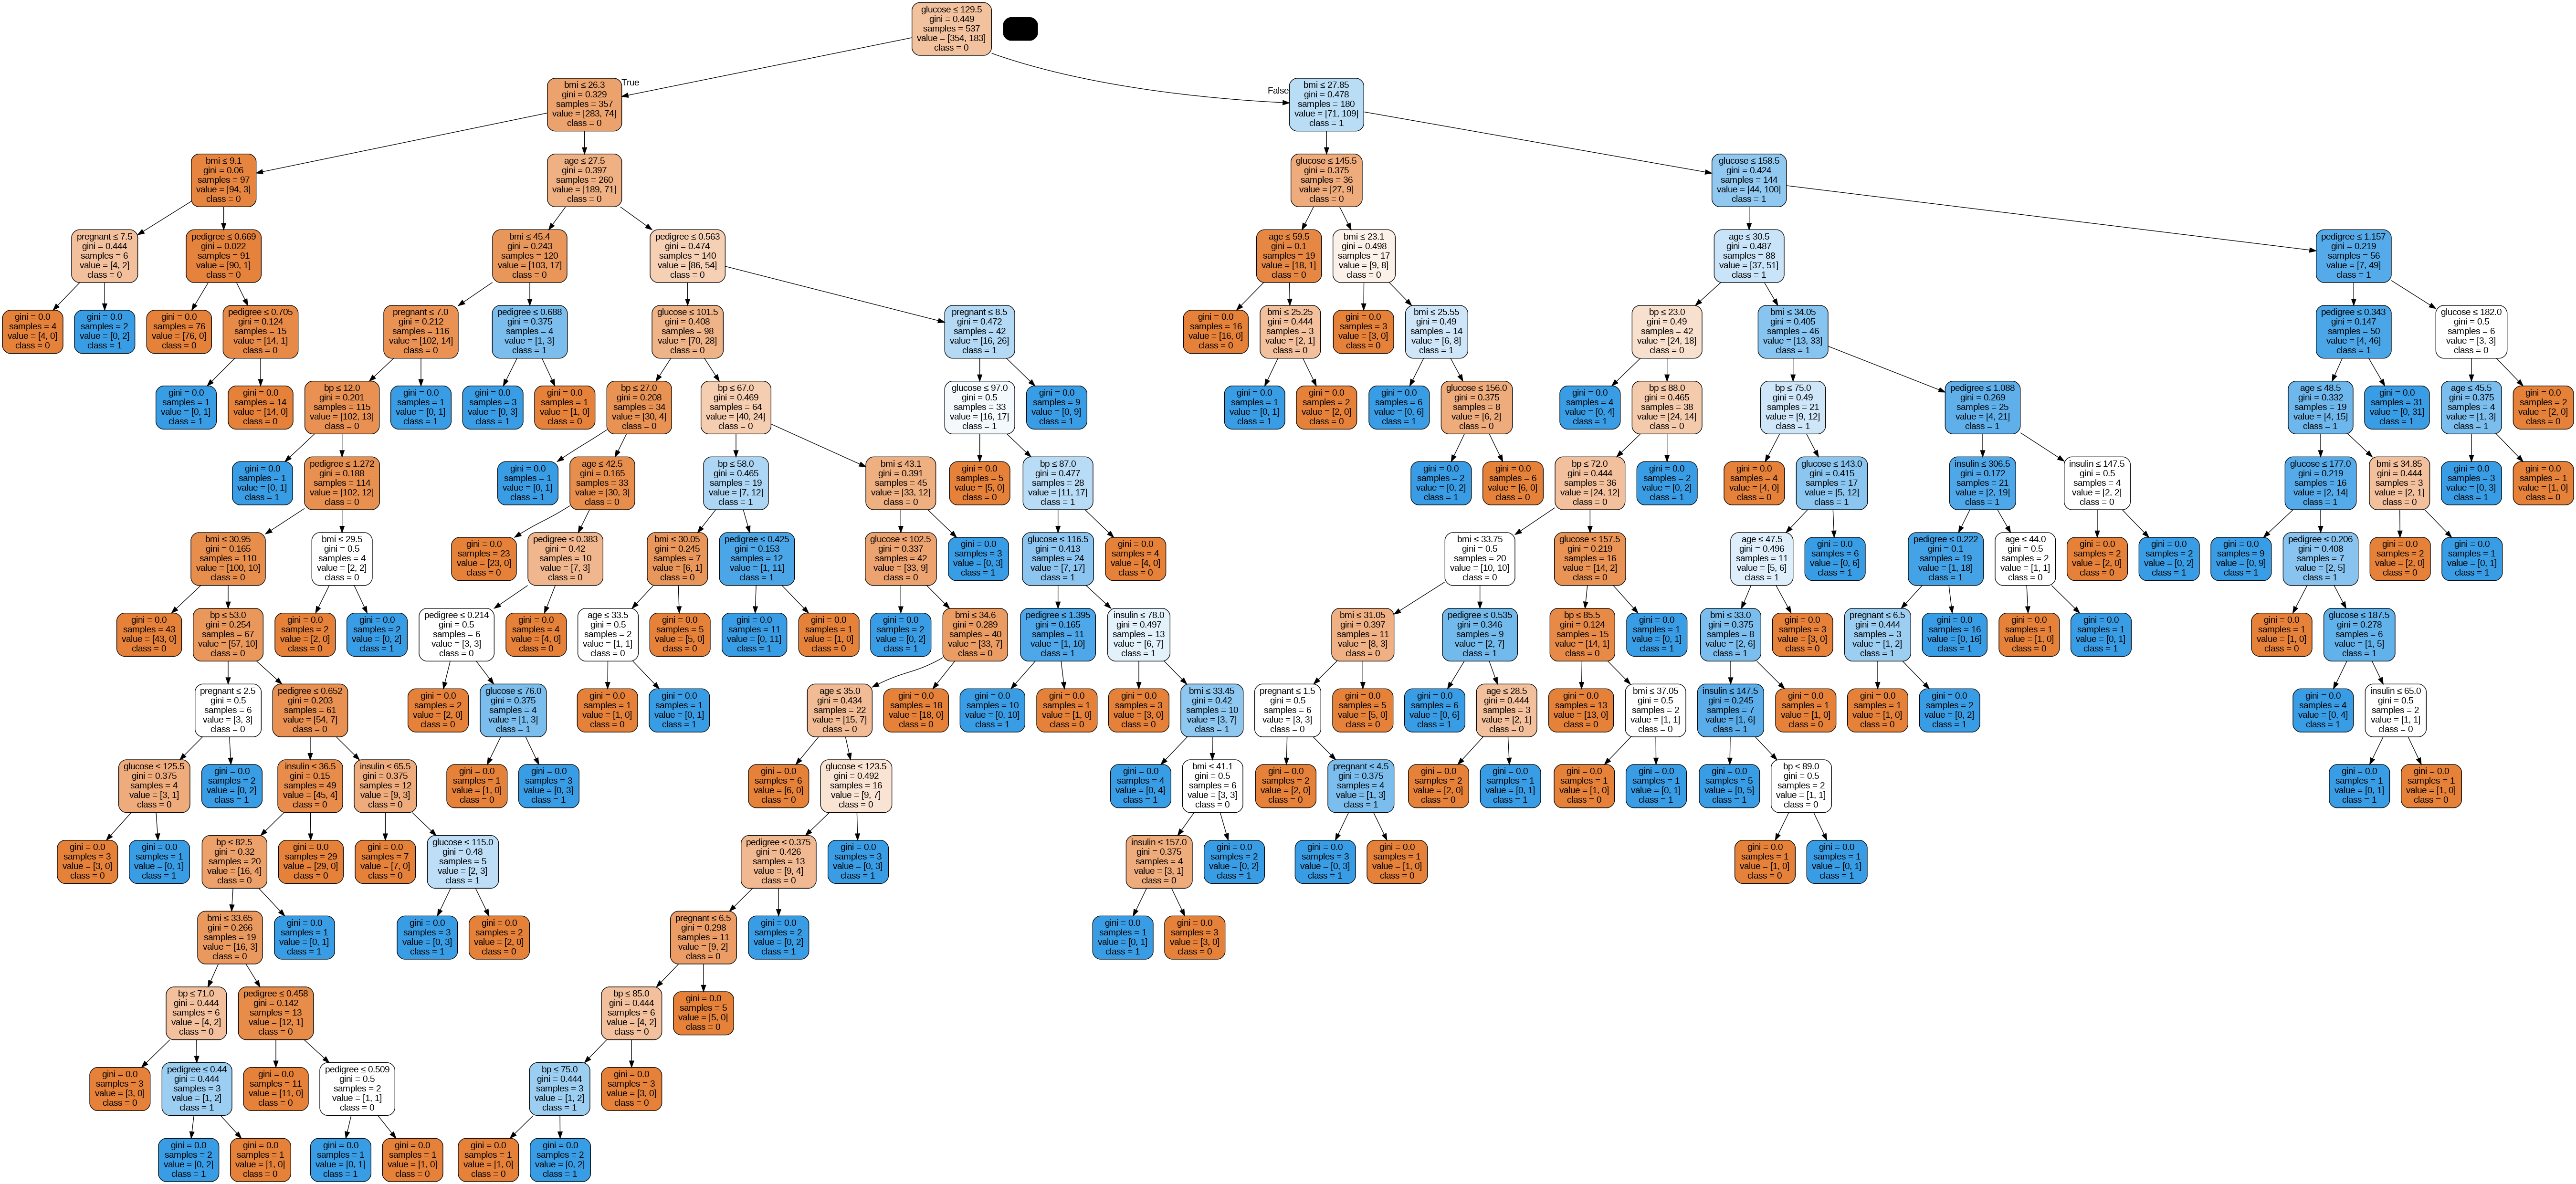

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())
